# Tutorial 1: The Basics

Let's learn by example. We start by predicting future energy prices and will explore the basics of the library.

If the NeuralProphet package is not installed yet, please refer to the [installation guide](../contents.rst#installing).

## Loading the dataset

For our tutorials we work with energy price data over the 4 years from Spain. The dataset was published on [Kaggle](https://www.kaggle.com/datasets/nicholasjhana/energy-consumption-generation-prices-and-weather) and contains a lot of information to which we will come back later. For now we use a prepared version of the dataset with the hourly energy price data only.

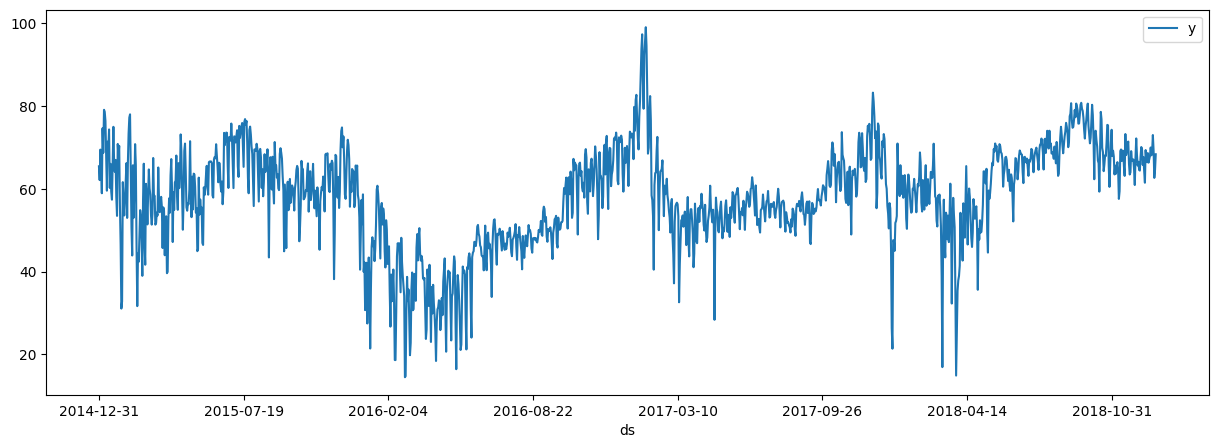

In [1]:
import pandas as pd

# Load the dataset from the CSV file using pandas
df = pd.read_csv("https://github.com/ourownstory/neuralprophet-data/raw/main/kaggle-energy/datasets/tutorial01.csv")
# Plot the dataset, showing price (y column) over time (ds column)
plt = df.plot(x="ds", y="y", figsize=(15, 5))

Note: Whenever you use a dataset with NeuralProphet, it must be a pandas dataframe with the following format and properties:

1. Time series column must be named "ds" and contain datetime values.
2. Value column must be named "y" and contain float values.

## Setting up the model

In [2]:
# Import the NeuralProphet class
from neuralprophet import NeuralProphet, set_log_level

# Disable logging messages unless there is an error
set_log_level("ERROR")

# Create a NeuralProphet model with default parameters
m = NeuralProphet()
# Use matplotlib for plotting (as plotly does not work in saved notebooks, see #1235)
m.set_plotting_backend("matplotlib")

# Fit the model on the dataset (this might take a bit)
metrics = m.fit(df)

Finding best initial lr:   0%|          | 0/229 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

## Forecast the future

To predict future values we have to extend our dataframe. In our example we want to create a forecast of the next year (meaning 365 days). Then we have to run the prediction again on the extended dataframe.

Predicting: 46it [00:00, ?it/s]

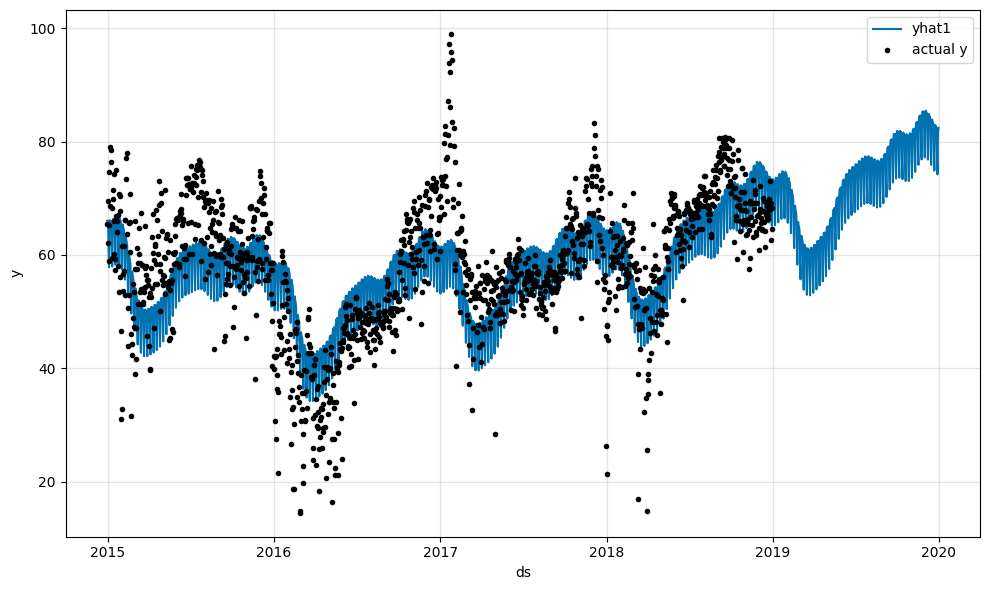

In [3]:
# Create a new dataframe reaching 365 into the future for our forecast, n_historic_predictions also shows historic data
df_future = m.make_future_dataframe(df, n_historic_predictions=True, periods=365)

# Predict the future
forecast = m.predict(df_future)

# Visualize the forecast
fig = m.plot(forecast)

The forecast is composed of the following components: trend, yearly and weekly seasonality. They are added together to create the forecast.

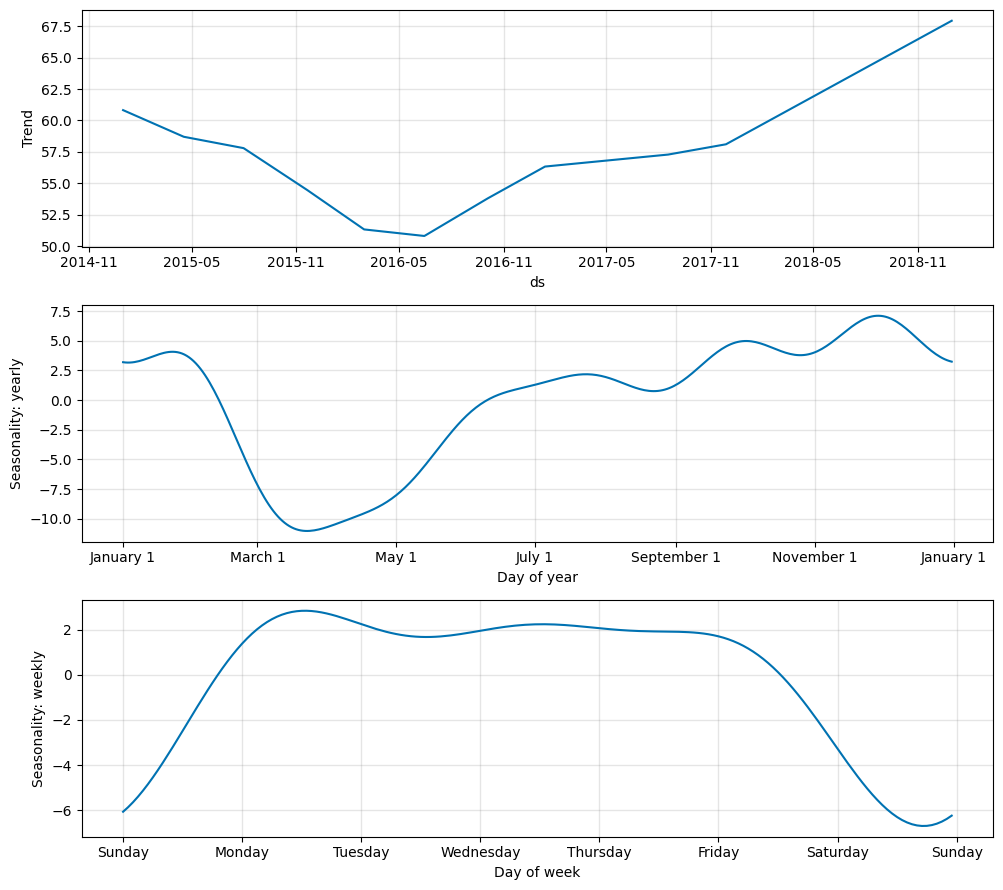

In [4]:
fig = m.plot_parameters(components=["trend", "seasonality"])